# EDA - Employee Satisfaction dataset analysis

Data in the following link https://www.kaggle.com/datasets/mohamedharris/employee-satisfaction-index-dataset. This is a fictional dataset with employees in a fictional company, with characteristics probably given through a fictional survey. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to make plots
import seaborn as sb

In [2]:
#Import the data. 
data = pd.read_csv("Employee Satisfaction Index.csv")

In [3]:
data #See what the dataset looks like.

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [4]:
data.drop_duplicates #Drop duplicates rows - the number of rows didn't change so there weren't any duplicates.

<bound method DataFrame.drop_duplicates of      Unnamed: 0    emp_id  age        Dept location education  \
0             0    HR8270   28          HR   Suburb        PG   
1             1  TECH1860   50  Technology   Suburb        PG   
2             2  TECH6390   43  Technology   Suburb        UG   
3             3   SAL6191   44       Sales     City        PG   
4             4    HR6734   33          HR     City        UG   
..          ...       ...  ...         ...      ...       ...   
495         495    HR5330   49          HR   Suburb        PG   
496         496  TECH9010   24  Technology   Suburb        UG   
497         497   MKT7801   34   Marketing     City        PG   
498         498  TECH5846   26  Technology     City        UG   
499         499  TECH7731   26  Technology     City        UG   

       recruitment_type  job_level  rating  onsite  awards  certifications  \
0              Referral          5       2       0       1               0   
1               Walk

In [7]:
data = data.drop(columns = ["Unnamed: 0", "emp_id"]) #id variables are not useful for exploratory analysis. However they are very useful to check for duplicates.  

                     age  job_level    rating    onsite    awards  \
age             1.000000  -0.057528 -0.096388 -0.054055 -0.019875   
job_level      -0.057528   1.000000  0.081829 -0.054843 -0.037793   
rating         -0.096388   0.081829  1.000000  0.009079  0.022983   
onsite         -0.054055  -0.054843  0.009079  1.000000  0.003722   
awards         -0.019875  -0.037793  0.022983  0.003722  1.000000   
certifications  0.025335  -0.002632 -0.030503  0.043558 -0.030066   
salary         -0.048294   0.977539  0.081034 -0.057936 -0.032339   
satisfied       0.004490   0.010093  0.093024  0.027637  0.014763   

                certifications    salary  satisfied  
age                   0.025335 -0.048294   0.004490  
job_level            -0.002632  0.977539   0.010093  
rating               -0.030503  0.081034   0.093024  
onsite                0.043558 -0.057936   0.027637  
awards               -0.030066 -0.032339   0.014763  
certifications        1.000000  0.004594  -0.011600  


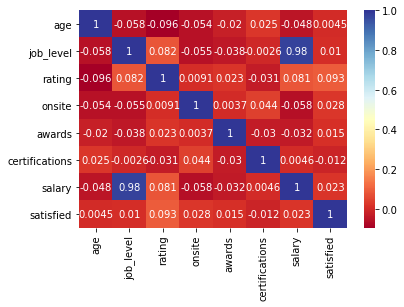

In [8]:
print(data.corr())   
# plotting correlation heatmap 
dataplot = sb.heatmap(data.corr(), cmap="RdYlBu", annot=True) 
  
# displaying heatmap 
plt.show() 

From the correlation heatmap, we can observe the following correlations (NOT implying causation) : 
    
- Job level is almost perfectly correlated with salary, which intuitively makes sense.
- Variables associated with higher rating : Higher job level (which is itself very correlated with salary), higher amount of awards (small effect), higher salary, and being satisfied (makes sense). 
- Variables associated with lower rating : Higher age, having certifications (small effect, nonetheless quite interesting...). 

In [9]:
from statsmodels.formula.api import ols

In [11]:
model = ols("rating ~ age + onsite + awards + certifications + salary + satisfied", data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.090
Date:                Mon, 13 Nov 2023   Prob (F-statistic):             0.0530
Time:                        22:50:23   Log-Likelihood:                -879.81
No. Observations:                 500   AIC:                             1774.
Df Residuals:                     493   BIC:                             1803.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2204      0.344      9.351      0.000       2.544       3.897
age               -0.0138      0.007     -2.053      0.041      -0.027      -0.001
onsite             0.0203      0.128      0.159      0.874      -0.230       0.271
awards             0.0107      0.022      0.481      0.631      -0.033       0.054
certifications    -0.0773      0.127     -0.609      0.543      -0.327       0.172
salary          4.559e-06   2.69e-06      1.696      0.090   -7.22e-07    9.84e-06
satisfied          0.2590      0.127      2.041      0.042       0.010       0.508
==============================================================================
Omnibus:                      552.773   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.454
Skew:                          -0.106   Prob(JB):                     3.30e-08
Kurtosis:                       1.732   Cond. No.                     3.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the linear regression output, we observe the following : 

- An additional year in age is associated with a lower rating of -0.0138, in average. The effect is significant at the 5% level. 
- An increase in salary of 100'000 is associated with a higher rating of 0.4559. In the next output we see that the highest salary is 86'750, so the impact of salary on ratings is not that high, even if significant at the 10% level. 
- Being satisfied is associated with a higher rating of 0.259 and the effect is significant at the 5% level. 
- The other variables effect are not significant, evidenced by the high P-values. 
- The R-squared of the model is low (0.025) so the model is definitely not the best to explain variations in ratings. 

In [22]:
print(data.max())

age                         54
Dept                Technology
location                Suburb
education                   UG
recruitment_type       Walk-in
job_level                    5
rating                       5
onsite                       1
awards                       9
certifications               1
salary                   86750
satisfied                    1
dtype: object
